In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
%matplotlib inline


In [4]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


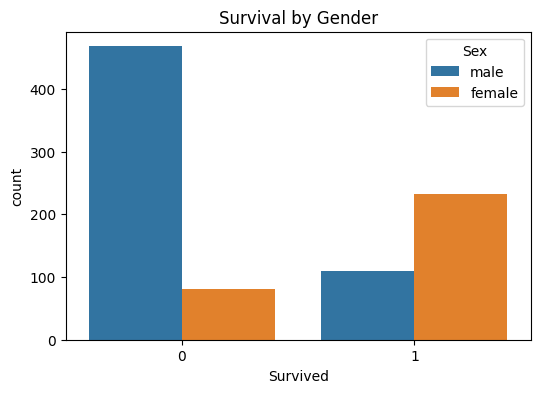

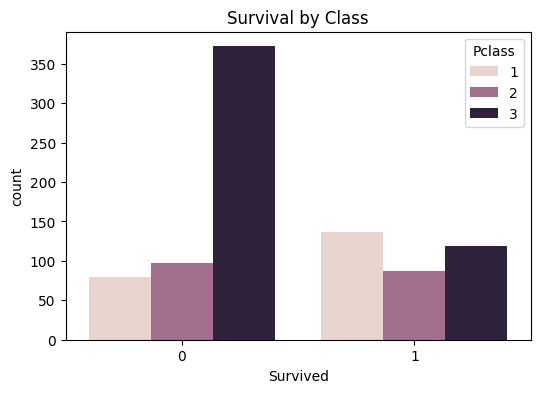

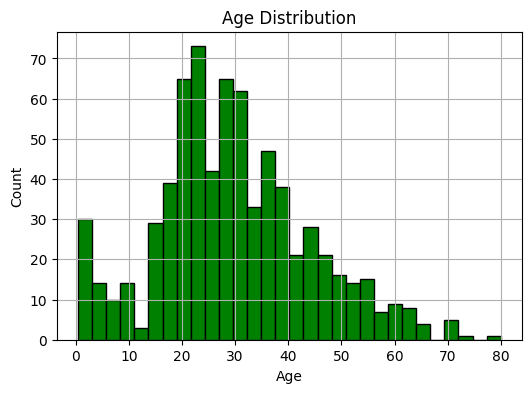

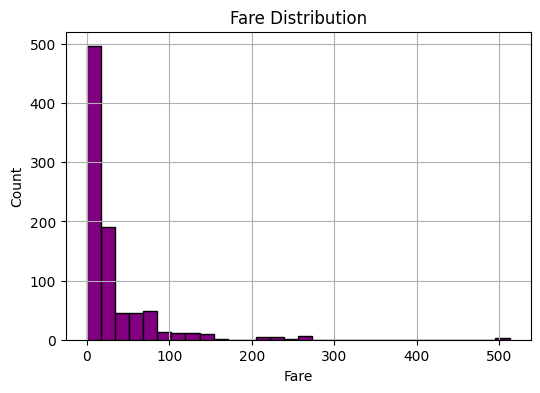

In [8]:
import matplotlib.pyplot as plt

# 1. Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

# 2. Survival by class
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Class')
plt.show()

# 3. Age distribution
plt.figure(figsize=(6,4))
train_df['Age'].hist(bins=30, color='green', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 4. Fare distribution
plt.figure(figsize=(6,4))
train_df['Fare'].hist(bins=30, color='purple', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [9]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')


In [10]:
cols_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']
train_df = train_df.drop(cols_to_drop, axis=1)
test_df_original = test_df.copy()  # keep PassengerId for submission
test_df = test_df.drop(cols_to_drop, axis=1)


In [11]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


In [12]:
missing_cols = set(train_df.columns) - set(test_df.columns)
missing_cols.discard('Survived')
for col in missing_cols:
    test_df[col] = 0

test_df = test_df[train_df.drop('Survived', axis=1).columns]


In [13]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8212290502793296
[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Validation Accuracy: 0.8212


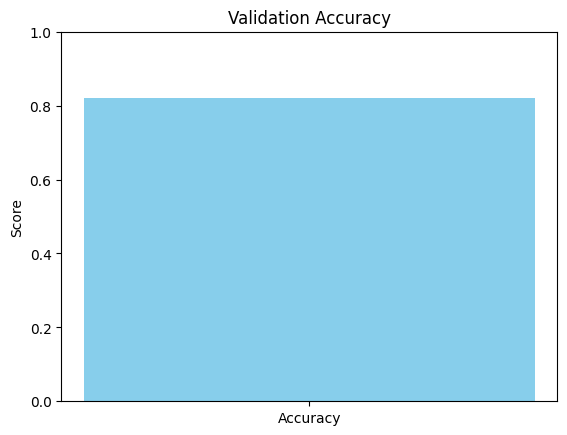

In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print accuracy score
print(f"Validation Accuracy: {accuracy:.4f}")  # e.g., 0.8135

# Plot bar chart
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title("Validation Accuracy")
plt.ylabel("Score")
plt.show()


In [17]:
final_predictions = model.predict(test_df)

submission = pd.DataFrame({
    'PassengerId': test_df_original['PassengerId'],
    'Survived': final_predictions
})

submission.to_csv('submission.csv', index=False)


In [18]:
df_final_submission = pd.read_csv('submission.csv')

In [19]:
df_final_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
